# ** Importing Libraries**

In [0]:
import pandas as pd
import numpy as np

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,cohen_kappa_score,matthews_corrcoef
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier 
import xgboost as xgb

# Data Preprocessing

In [6]:
from google.colab import files
file=files.upload()

Saving PatientData.csv to PatientData.csv


In [8]:
data=pd.read_csv('PatientData.csv')
data.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,NaN,NaN
2,Male,28.0,0,0,0,0,never,NaN
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


In [9]:
data.isna().sum()

gender                 0
age                    0
diabetes               0
hypertension           0
stroke                 0
heart disease          0
smoking history    35816
BMI                25444
dtype: int64

In [10]:
data.dtypes

gender              object
age                float64
diabetes             int64
hypertension         int64
stroke               int64
heart disease        int64
smoking history     object
BMI                float64
dtype: object

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

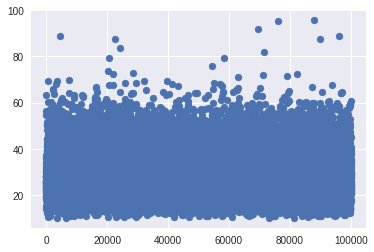

In [12]:
plt.scatter(data.index,data.BMI)

In [0]:
data['smoking history']=data['smoking history'].fillna('Unknown')

In [14]:
data['smoking history'].value_counts()

Unknown        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking history, dtype: int64

In [0]:
train_data_cat=data.select_dtypes(include=[object])
train_data_num=data.select_dtypes(exclude=[object])
train_data_cat=pd.get_dummies(train_data_cat, columns=train_data_cat.columns, drop_first=True)
data_df=pd.concat([train_data_cat,train_data_num],axis=1)

In [16]:
data_df.head()

,gender_Male,gender_Other,smoking history_current,smoking history_ever,smoking history_former,smoking history_never,smoking history_not current,age,diabetes,hypertension,stroke,heart disease,BMI
0,0,0,0,0,0,1,0,80.0,0,0,0,1,25.19
1,0,0,0,0,0,0,0,54.0,0,0,0,0,NaN
2,1,0,0,0,0,1,0,28.0,0,0,0,0,NaN
3,0,0,1,0,0,0,0,36.0,0,0,0,0,23.45
4,1,0,1,0,0,0,0,76.0,0,1,0,1,20.14


In [17]:
from fancyimpute import IterativeImputer

Using TensorFlow backend.


In [0]:
XY_incomplete = data_df.copy()

In [0]:
data_complete_df = pd.DataFrame(IterativeImputer(n_iter=20, sample_posterior=True, random_state=8).fit_transform(XY_incomplete))

In [0]:
data_complete_df.columns=data_df.columns

In [21]:
data_complete_df.head()

,gender_Male,gender_Other,smoking history_current,smoking history_ever,smoking history_former,smoking history_never,smoking history_not current,age,diabetes,hypertension,stroke,heart disease,BMI
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,0.0,0.0,1.0,25.190000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,18.982447
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,0.0,0.0,0.0,0.0,27.603525
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,23.450000
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,76.0,0.0,1.0,0.0,1.0,20.140000


In [42]:
data_complete_df.shape

(100000, 22)

In [0]:
data_complete_df['diabetes & hypertension']=data_complete_df['diabetes']*data_complete_df['hypertension']
data_complete_df['diabetes & srtoke']=data_complete_df['diabetes']*data_complete_df['stroke']
data_complete_df['diabetes & heart disease']=data_complete_df['diabetes']*data_complete_df['heart disease']
data_complete_df['hypertension & stroke']=data_complete_df['hypertension']*data_complete_df['stroke']
data_complete_df['hypertension & heart disease']=data_complete_df['hypertension']*data_complete_df['heart disease']
data_complete_df['stroke & heart disease']=data_complete_df['stroke']*data_complete_df['heart disease']

In [0]:
data_complete_df['diabetes,hypertension,stroke']=data_complete_df['diabetes']*data_complete_df['hypertension']*data_complete_df['stroke']
data_complete_df['diabetes,hypertension,heart disease']=data_complete_df['diabetes']*data_complete_df['hypertension']*data_complete_df['heart disease']
data_complete_df['hypertension,stroke,heart disease']=data_complete_df['hypertension']*data_complete_df['stroke']*data_complete_df['heart disease']

In [24]:
data_complete_df.shape

(100000, 22)

In [25]:
data_complete_df.head()

,gender_Male,gender_Other,smoking history_current,smoking history_ever,smoking history_former,smoking history_never,smoking history_not current,age,diabetes,hypertension,...,BMI,diabetes & hypertension,diabetes & srtoke,diabetes & heart disease,hypertension & stroke,hypertension & heart disease,stroke & heart disease,"diabetes,hypertension,stroke","diabetes,hypertension,heart disease","hypertension,stroke,heart disease"
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,0.0,...,25.190000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,...,18.982447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,0.0,0.0,...,27.603525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,...,23.450000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,76.0,0.0,1.0,...,20.140000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([ 8981.,  7220.,  9684., 10368., 10619., 11669., 12136., 10755.,
         7873., 10695.]),
 array([ 0.08 ,  8.072, 16.064, 24.056, 32.048, 40.04 , 48.032, 56.024,
        64.016, 72.008, 80.   ]),
 <a list of 10 Patch objects>)

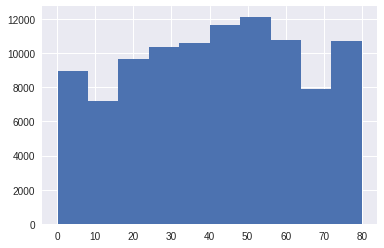

In [29]:
plt.hist(data['age'])

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8.6570e+03, 3.1394e+04, 2.4929e+04, 7.3890e+03, 1.7160e+03,
        3.7900e+02, 7.3000e+01, 8.0000e+00, 4.0000e+00, 7.0000e+00]),
 array([10.01 , 18.578, 27.146, 35.714, 44.282, 52.85 , 61.418, 69.986,
        78.554, 87.122, 95.69 ]),
 <a list of 10 Patch objects>)

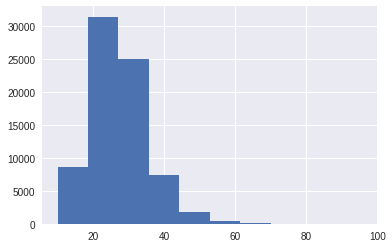

In [31]:
plt.hist(data['BMI'])

In [32]:
data_complete_df['stroke'].value_counts()

0.0    98574
1.0     1426
Name: stroke, dtype: int64

In [0]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data_complete_df.drop(['stroke'], axis= 1), 
                                                    data_complete_df['stroke'], test_size=0.3, random_state=11)

# ** Plotting**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


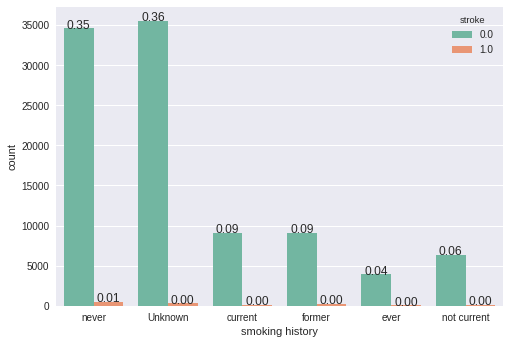

In [23]:
total_records=len(data_complete_df)
ax1 = sns.countplot(data=data_complete_df,x= data['smoking history'],hue="stroke",palette="Set2")
    
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
    height + 3,
    '{:1.2f}'.format(height/total_records,0),
    ha="center",rotation=0) 

In [0]:
print("Number of Employees in X_train dataset: ", x_train.shape)
print("Number of Employees in y_train dataset: ", y_train.shape)
print("Number of Employees in X_test dataset: ", x_test.shape)
print("Number of Employees in y_test dataset: ", y_test.shape)

Number of Employees in X_train dataset:  (70000, 21)
Number of Employees in y_train dataset:  (70000,)
Number of Employees in X_test dataset:  (30000, 21)
Number of Employees in y_test dataset:  (30000,)


In [47]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 993
Before OverSampling, counts of label '0': 69007 



In [0]:
sm = SMOTE(random_state= 2)

In [0]:
X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

In [50]:
print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of X_train: (138014, 21)
After OverSampling, the shape of y_train: (138014,) 

After OverSampling, counts of label '1': 69007
After OverSampling, counts of label '0': 69007


# ** Models on upsampled data**

In [51]:
models=[RandomForestClassifier(),AdaBoostClassifier(),BaggingClassifier(),LinearSVC(),
        KNeighborsClassifier(), DecisionTreeClassifier(),LogisticRegression(), GradientBoostingClassifier(), XGBClassifier(),GaussianNB()]
model_names=['RandomForestClassifier','AdaBoostClassifier','BaggingClassifier','LinearSVC',
             'KNeighborsClassifier', 'DecisionTreeClassifier', 'LogisticRegression', 
             'GradientBoostingClassifier', 'XGBClassifier','GaussianNB']
ROC_AUC_scores = []
F1_score=[]
mcc=[]

d={}

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train_res, y_train_res)
    test_pred = clf.predict(x_test.as_matrix())
    ROC_AUC_scores.append(roc_auc_score(y_test, test_pred))
    F1_score.append(f1_score(y_test,test_pred))
    mcc.append(matthews_corrcoef(y_test,test_pred))
    
d={'Modelling Algo':model_names, 'ROC_AUC_Scores': ROC_AUC_scores,'F1_Score':F1_score,'MCC':mcc}   
df_models = pd.DataFrame(d)
df_models

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,F1_Score,MCC,Modelling Algo,ROC_AUC_Scores
0,0.503415,0.501272,RandomForestClassifier,0.792273
1,0.345544,0.392546,AdaBoostClassifier,0.846632
2,0.484449,0.484024,BaggingClassifier,0.790493
3,0.709389,0.738953,LinearSVC,0.774827
4,0.169550,0.194793,KNeighborsClassifier,0.697867
5,0.454308,0.458983,DecisionTreeClassifier,0.793691
6,0.176083,0.267550,LogisticRegression,0.873681
7,0.377736,0.412360,GradientBoostingClassifier,0.834119
8,0.333691,0.380734,XGBClassifier,0.840182
9,0.405451,0.409302,GaussianNB,0.766321


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


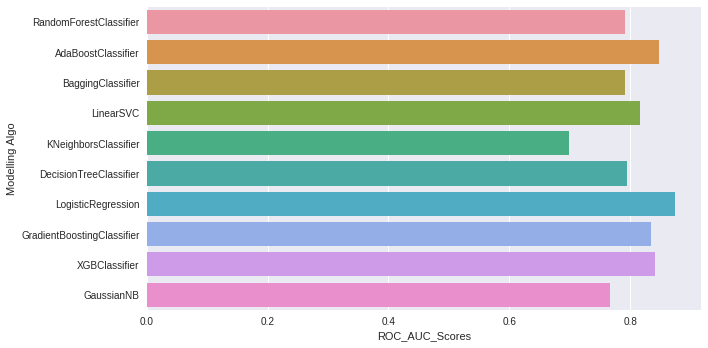

In [0]:
import seaborn as sns
sns.factorplot(y='Modelling Algo', x='ROC_AUC_Scores', data= df_models, kind = 'bar', size=5, aspect=2)

**1) Logistic Regression
2) AdaBoost
3) XGBoost
4) Gradient Boost
5) SVM** 

# Neural Network

In [0]:
from keras.layers import Dense,Input,BatchNormalization,Dropout
from keras.models import Model,K, Sequential
from keras.optimizers import SGD, rmsprop

In [0]:
K.clear_session()
def build_model():
  classifier = Sequential()
  classifier.add(Dense(output_dim=12,input_dim=21,init='uniform',activation='relu'))
  classifier.add(Dropout(rate=0.01))
  classifier.add(Dense(output_dim=12,input_dim=21,init='uniform',activation='relu'))
  classifier.add(Dropout(rate=0.01))
  classifier.add(Dense(output_dim=1,input_dim=21,init='uniform',activation='sigmoid'))
  classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=[auc])
  return classifier

In [0]:
classifier.summary()

NameError: ignored

In [0]:
import tensorflow as tf
from keras import backend as K

def auc(y_test,y_pred_keras):
    auc = tf.metrics.auc(y_test, y_pred_keras)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train_res, y_train_res, epochs=100, batch_size=100,verbose=1,validation_split=0.3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=21, activation="relu", units=12, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=21, activation="relu", units=12, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=21, activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Train on 96609 samples, validate on 41405 samples
Epoch 1/100
96609/96609 [==============================] - 3s 32us/step - loss: 0.4250 - auc: 0.7329 - val_loss: 0.6082 - val_auc: 0.8567
Epoch 2/100
96609/96609 [==============================] - 3s 28us/step - loss: 0.2702 - auc: 0.8850 - val_loss: 0.6503 - val_auc: 0.8982
Epoch 3/100
96609/96609 [==============================] - 3s 29us/step - loss: 0.2481 - auc: 0.9051 - val_loss: 0.3675 - val_auc: 0.9167
Epoch 4/100
96609/96609 [==============================] - 3s 29us/step - loss: 0.2416 - auc: 0.9242 - val_loss: 0.3623 - val_auc: 0.9297
Epoch 5/100
96609/96609 [==============================] - 3s 29us/step - loss: 0.2355 - auc: 0.9339 - val_loss: 0.4246 - val_auc: 0.9365
Epoch 6/100
96609/96609 [==============================] - 3s 29us/step - loss: 0.2295 - auc: 0.9387 - val_loss: 0.4792 - val_auc: 0.9400
Epoch 7/100
96609/96609 [==============================] - 3s 29us/step - loss: 0.2235 - auc: 0.9412 - val_loss: 0.3070 - 

In [0]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [0]:
auc_keras = auc(fpr_keras, tpr_keras)

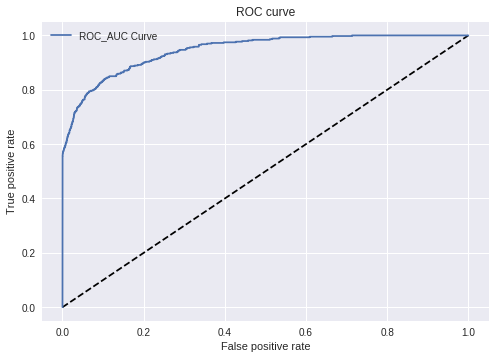

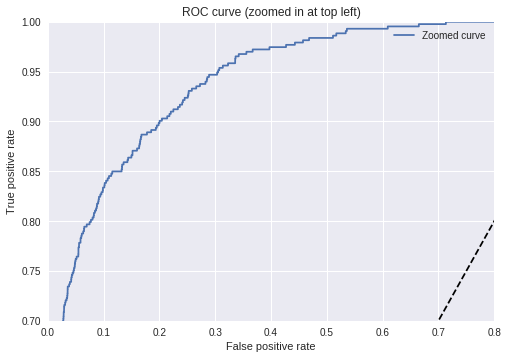

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras,label='ROC_AUC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.8)
plt.ylim(0.7, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras,label='Zoomed curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# Tuning

In [0]:
logic=LogisticRegression()
adaboost=AdaBoostClassifier()
xgboost=XGBClassifier()
gboost=GradientBoostingClassifier()
svm=LinearSVC()

In [0]:
param_grid_logic={"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
param_grid_adaboost={'n_estimators':[50,100,200],'learning_rate':[0.0001,0.0003,0.0005]}
param_grid_xgboost={'n_estimators':[50,100,200],'learning_rate':[0.001,0.01,0.05,0.1],'max_depth':[3,5,7,9]}
param_grid_gboost={'n_estimators':[50,100,200],'learning_rate':[0.0001,0.0003,0.0005],'max_depth': [4, 6, 8,10]}
param_grid_svm={'kernel':('linear', 'rbf'), 'C':[0.1,1,10]}


In [0]:
best_model_logic = GridSearchCV(estimator=logic,param_grid=param_grid_logic,scoring='roc_auc',n_jobs=-1,cv=5)
best_model_adaboost = GridSearchCV(estimator=adaboost,param_grid=param_grid_adaboost,scoring='roc_auc',n_jobs=-1,cv=5)
best_model_xgboost = GridSearchCV(estimator=xgboost,param_grid=param_grid_xgboost,scoring='roc_auc',n_jobs=-1,cv=5)
best_model_gboost = GridSearchCV(estimator=gboost,param_grid=param_grid_gboost,scoring='roc_auc',n_jobs=-1,cv=5)
best_model_svm = GridSearchCV(estimator=svm,param_grid=param_grid_svm,scoring='roc_auc',n_jobs=-1,cv=5)


In [0]:
best_model_logic.fit(X_train_res,y_train_res)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [0]:
best_model_logic.best_params_

{'C': 10, 'penalty': 'l1'}

In [0]:
cross_val_score(best_model_logic.best_estimator_,X=X_train_res,y=y_train_res,cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.87773511, 0.87947399, 0.87932034, 0.87761756, 0.8826172 ])

In [0]:
cross_val_score(best_model_logic.best_estimator_,X=X_train_res,y=y_train_res,cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.8793600868183447

In [0]:
best_model_adaboost.fit(X=X_train_res,y=y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200], 'learning_rate': [0.0001, 0.0003, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [0]:
best_model_adaboost.best_params_

{'learning_rate': 0.0005, 'n_estimators': 200}

In [0]:
cross_val_score(best_model_adaboost.best_estimator_,X=X_train_res,y=y_train_res,cv=5)

array([0.77188089, 0.77140994, 0.77559597, 0.77447286, 0.77411057])

In [0]:
cross_val_score(best_model_adaboost.best_estimator_,X=X_train_res,y=y_train_res,cv=5).mean()

0.7734940469411287

In [0]:
best_model_xgboost.fit(X=X_train_res,y=y_train_res)

In [0]:
best_model_xgboost.best_params_

In [0]:
cross_val_score(best_model_xgboost.best_estimator_,X=X_train_res,y=y_train_res,cv=5)

In [0]:
cross_val_score(best_model_xgboost.best_estimator_,X=X_train_res,y=y_train_res,cv=5).mean()

In [0]:
best_model_gboost.fit(X=X_train_res,y=y_train_res)

In [0]:
best_model_gboost.best_params_

In [0]:
cross_val_score(best_model_gboost.best_estimator_,X=X_train_res,y=y_train_res,cv=5)

In [0]:
cross_val_score(best_model_gboost.best_estimator_,X=X_train_res,y=y_train_res,cv=5).mean()

In [0]:
best_model_svm.fit(X=X_train_res,y=y_train_res)

In [0]:
best_model_svm.best_params_

In [0]:
cross_val_score(best_model_svm.best_estimator_,X=X_train_res,y=y_train_res,cv=5)

In [0]:
cross_val_score(best_model_svm.best_estimator_,X=X_train_res,y=y_train_res,cv=5).mean()

In [0]:
dff.head(20)

# **Models on imbalanced dataset**

In [46]:
models=[RandomForestClassifier(),AdaBoostClassifier(),BaggingClassifier(),LinearSVC(),
        KNeighborsClassifier(), DecisionTreeClassifier(),LogisticRegression(), GradientBoostingClassifier(), XGBClassifier(),GaussianNB()]
model_names=['RandomForestClassifier','AdaBoostClassifier','BaggingClassifier','LinearSVC',
             'KNeighborsClassifier', 'DecisionTreeClassifier', 'LogisticRegression', 
             'GradientBoostingClassifier', 'XGBClassifier','GaussianNB']
ROC_AUC_scores = []
F1_score=[]
ck=[]
mcc=[]

d={}

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train, y_train)
    test_pred = clf.predict(x_test)
    ROC_AUC_scores.append(roc_auc_score(y_test, test_pred))
    F1_score.append(f1_score(y_test,test_pred))
    ck.append(cohen_kappa_score(y_test,test_pred))
    mcc.append(matthews_corrcoef(y_test,test_pred))
    
d={'Modelling Algo':model_names, 'ROC_AUC_Scores': ROC_AUC_scores,'F1_Score':F1_score,'cohen kappa':ck,'MCC':mcc}   
df_models = pd.DataFrame(d)
df_models

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,F1_Score,MCC,Modelling Algo,ROC_AUC_Scores,cohen kappa
0,0.642667,0.646224,RandomForestClassifier,0.777006,0.638253
1,0.708333,0.737373,AdaBoostClassifier,0.774810,0.705308
2,0.653951,0.660841,BaggingClassifier,0.776105,0.649805
3,0.709389,0.738953,LinearSVC,0.774827,0.706383
4,0.116129,0.227217,KNeighborsClassifier,0.531093,0.114370
5,0.535675,0.529200,DecisionTreeClassifier,0.777798,0.528534
6,0.707463,0.737387,LogisticRegression,0.773672,0.704445
7,0.704142,0.731148,GradientBoostingClassifier,0.774742,0.701040
8,0.709389,0.738953,XGBClassifier,0.774827,0.706383
9,0.405451,0.409302,GaussianNB,0.766321,0.394418


In [26]:
y_train.value_counts()

0.0    69007
1.0      993
Name: stroke, dtype: int64

In [27]:
y_test.value_counts()

0.0    29567
1.0      433
Name: stroke, dtype: int64

In [32]:
pp=pd.DataFrame(test_pred,columns=['prediction'])
pp.head()

,prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [33]:
pp['prediction'].value_counts()

0.0    29259
1.0      741
Name: prediction, dtype: int64

In [37]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xg_pred=xgb.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
print(confusion_matrix(y_test,xg_pred))

[[29567     0]
 [  195   238]]


In [42]:
print(classification_report(y_test,xg_pred))

             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00     29567
        1.0       1.00      0.55      0.71       433

avg / total       0.99      0.99      0.99     30000



# ** Data to csv **

In [0]:
data_complete_df.to_excel(r'C:\Users\user\Desktop\BA\Term-III\Capstone Project\New_data.xlsx')

In [0]:
from google.colab import files

# ** Clustering**

In [1]:
!pip install pyclustering

    100% |████████████████████████████████| 2.1MB 10.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/d6/61/75/0f70c5f9e363b194b6bc197794c4376f72a550e9d5faf19958
Successfully built pyclustering
